In [28]:
import numpy as np 
import pandas as pd
import keras
import pickle
import matplotlib.pyplot as plt
import tqdm
from timeit import default_timer as timer
from alive_progress import alive_bar

from keras import layers
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

import os

print(os.listdir('./'))


['filters-13x13.png', 'filters-15x15.png', 'filters-19x19.png', 'filters-23x23.png', 'filters-25x25.png', 'filters-31x31.png', 'filters-3x3.png', 'filters-5x5.png', 'filters-9x9.png', 'model-13x13.h5', 'model-15x15.h5', 'model-19x19.h5', 'model-23x23.h5', 'model-25x25.h5', 'model-31x31.h5', 'model-3x3.h5', 'model-5x5.h5', 'model-9x9.h5', 'models_accuracy.png', 'models_accuracy_vs_our.png', 'overfitting_small_data.png', 'traffic-signs-classification-with-cnn.ipynb', 'training_examples.png', '__results___files']


In [3]:
with open('../traffic-signs-preprocessed\data2.pickle', 'rb') as f:
    data = pickle.load(f, encoding='latin1')

data['y_train'] = to_categorical(data['y_train'], num_classes=43)
data['y_validation'] = to_categorical(data['y_validation'], num_classes=43)
data['y_test'] = data['y_test']

data['x_train'] = data['x_train'].transpose(0, 2, 3, 1)
data['x_validation'] = data['x_validation'].transpose(0, 2, 3, 1)
data['x_test'] = data['x_test'].transpose(0, 2, 3, 1)

for i, j in data.items():
    if i == 'labels':
        print(i + ':', len(j))
    else: 
        print(i + ':', j.shape)


y_test: (12630,)
y_validation: (4410, 43)
x_validation: (4410, 32, 32, 3)
x_train: (86989, 32, 32, 3)
y_train: (86989, 43)
labels: 43
x_test: (12630, 32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

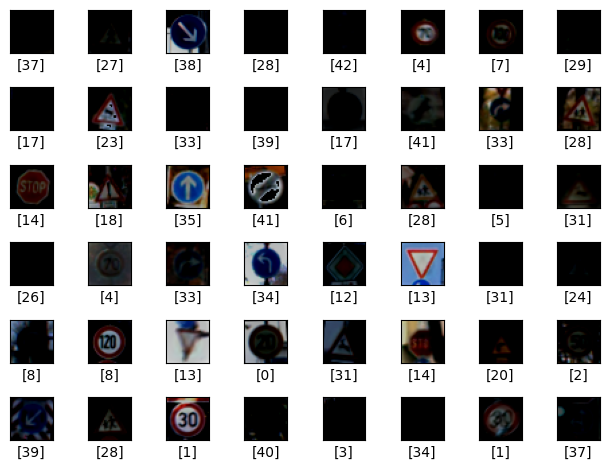

In [7]:
ROWS = 6
COLS = 8
i = 0
examples = data['x_train'][:81, :, :, :]
yexamples = data['y_train'][:81, :]

plt.figure()
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(examples[i] , cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(np.where(yexamples[i] == 1.00)[0])
        i += 1
plt.tight_layout()
plt.show() 

In [8]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=data['x_train'].shape[1:]),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(43, activation='softmax')
])
model.compile(
    optimizer='sgd', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [9]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** (x + epochs))
epochs = 15

h1 = model.fit(data['x_train'], data['y_train'],
              batch_size=5, epochs = epochs,
              validation_data = (data['x_validation'], data['y_validation']),
              callbacks=[annealer], verbose=1)

Epoch 1/15
17398/17398 [==============================] - 50s 3ms/step - loss: 3.7330 - accuracy: 0.0386 - val_loss: 3.6913 - val_accuracy: 0.0703 - lr: 4.6329e-04
Epoch 2/15
17398/17398 [==============================] - 50s 3ms/step - loss: 3.4498 - accuracy: 0.0928 - val_loss: 3.3413 - val_accuracy: 0.0805 - lr: 4.4013e-04
Epoch 3/15
17398/17398 [==============================] - 49s 3ms/step - loss: 2.8157 - accuracy: 0.2353 - val_loss: 2.6641 - val_accuracy: 0.2571 - lr: 4.1812e-04
Epoch 4/15
17398/17398 [==============================] - 50s 3ms/step - loss: 2.0305 - accuracy: 0.4521 - val_loss: 1.8390 - val_accuracy: 0.4490 - lr: 3.9721e-04
Epoch 5/15
17398/17398 [==============================] - 50s 3ms/step - loss: 1.4260 - accuracy: 0.6170 - val_loss: 1.4202 - val_accuracy: 0.5746 - lr: 3.7735e-04
Epoch 6/15
17398/17398 [==============================] - 51s 3ms/step - loss: 1.0711 - accuracy: 0.7153 - val_loss: 1.0941 - val_accuracy: 0.7039 - lr: 3.5849e-04
Epoch 7/15
17398

In [10]:
print('Model with epochs={0:d}, training accuracy={1:.5f}, validation accuracy={2:.5f}'.\
      format(epochs, max(h1.history['accuracy']), max(h1.history['val_accuracy'])))


Model with epochs=15, training accuracy=0.92637, validation accuracy=0.83741


In [11]:
start = timer()
temp = model.predict(data['x_test'][:1, :, :, :])
end = timer()

print('data2 classification time = {0:.5f}'.format(end - start))

1/1 [==============================] - 0s 73ms/step
data2 classification time = 0.10068


In [63]:
model1.save("model9000.h5")